In [1]:
import sys
import pandas as pd
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import implicit

In [2]:
raw_data = pd.read_csv('C:/Users/Yingting L/Desktop/recommender/SVD implicit/356365.csv')

In [30]:
data=raw_data.user_id.value_counts()

In [40]:
more=data[data>1]

In [41]:
more.count()

58577

In [25]:
58577/179477

0.32637608161491444

In [38]:
mo=data[data>2]

In [39]:
mo.count()

28163

In [42]:
28163/179477

0.15691704229511302

In [52]:
df = raw_data[raw_data['count'] > 2 ]

C:\Users\Yingting L\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


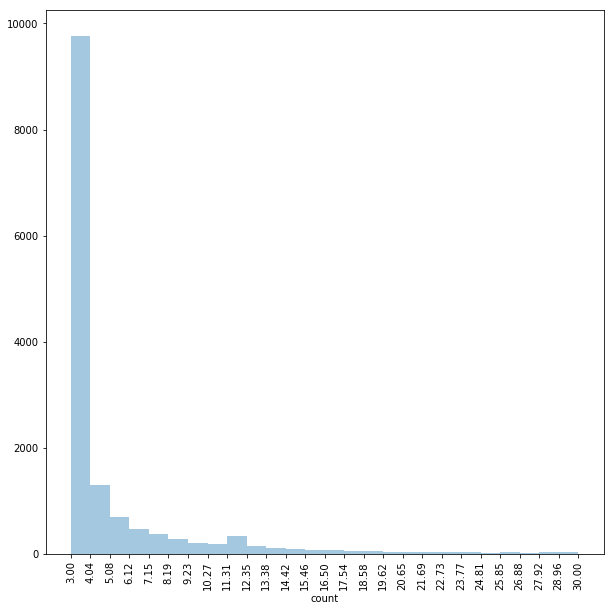

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
# fig,ax = plt.figure(figsize=(15,10))
tick_labels = np.linspace(3,30,27)
sns.distplot(df['count'],bins=tick_labels, kde=False, norm_hist=False,ax=ax)
plt.xticks(tick_labels,rotation=90)
plt.show()

In [54]:
df.head()

,user_id,service_type_id,count
3,24,522,39
13,136,522,4
40,269,57,5
42,269,522,3
52,287,595,7


In [50]:
raw_data

,user_id,service_type_id,count
0,2,508,1
1,9,8,1
2,12,399,1
3,24,522,39
4,29,57,1
5,42,1,1
6,42,34,1
7,42,57,2
8,61,33,1
9,116,15,1


In [63]:
data=raw_data.service_type_id.value_counts()

In [64]:
data

57     38694
1      21867
522    19454
508    11375
102    11038
33     10811
6       8975
59      7227
22      7173
3       6975
115     6963
106     6449
65      4480
2       4154
441     3783
58      3636
15      3354
27      3346
34      3087
153     3015
512     3009
5       2893
105     2887
397     2813
480     2789
379     2721
28      2623
374     2560
510     2374
103     2186
       ...  
453        1
301        1
422        1
463        1
85         1
592        1
79         1
590        1
589        1
588        1
587        1
604        1
95         1
573        1
626        1
217        1
629        1
565        1
467        1
638        1
643        1
554        1
646        1
140        1
653        1
144        1
147        1
534        1
669        1
461        1
Name: service_type_id, Length: 405, dtype: int64